In [1]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

def load_fashion_mnist():
    """
    Loads Fashion MNIST dataset.
    
    Adapted from: https://github.com/zalandoresearch/fashion-mnist/blob/master/utils/mnist_reader.py
    """
    TRAIN_IMAGES = 'train-images-idx3-ubyte.gz'
    TRAIN_LABELS = 'train-labels-idx1-ubyte.gz'    
    TEST_IMAGES = 't10k-images-idx3-ubyte.gz'
    TEST_LABELS = 't10k-labels-idx1-ubyte.gz'

    with gzip.open(TRAIN_LABELS, 'rb') as tr_labels_file, gzip.open(TEST_LABELS, 'rb') as ts_labels_file:
        train_labels = np.frombuffer(tr_labels_file.read(), dtype=np.uint8, offset=8)
        test_labels = np.frombuffer(ts_labels_file.read(), dtype=np.uint8, offset=8)

    with gzip.open(TRAIN_IMAGES, 'rb') as tr_images_file, gzip.open(TEST_IMAGES, 'rb') as ts_images_file:
        train_images = np.frombuffer(tr_images_file.read(), dtype=np.uint8, offset=16).reshape(len(train_labels), 784)
        test_images = np.frombuffer(ts_images_file.read(), dtype=np.uint8, offset=16).reshape(len(test_labels), 784)

    return train_images, train_labels, test_images, test_labels

In [2]:
def pretty_print(image_example):
    """ Pretty prints a Fashion MNIST example.

    Parameters:
        image_example: a 1x784 numpy array corresponding to the features of
                       a single image.

    Returns:
        None.
    """
    print(np.array_str(image_example, precision=1, max_line_width=116))

In [3]:
train_images, train_labels, test_images, test_labels = load_fashion_mnist()

In [4]:
print("Dimensions of training set feature matrix:", train_images.shape)
print("Dimensions of training set label matrix:", train_labels.shape)
EXAMPLE_INDEX = np.random.randint(60000)
print("Features of training example at index {}:\n".format(EXAMPLE_INDEX))
pretty_print(train_images[EXAMPLE_INDEX])

# And here's the label that goes with that training example
print("\nLabel of training example at index {}:".format(EXAMPLE_INDEX), train_labels[EXAMPLE_INDEX], '\n')
print(np.unique(train_labels))

Dimensions of training set feature matrix: (60000, 784)
Dimensions of training set label matrix: (60000,)
Features of training example at index 46697:

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  94  36   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0  57 184 166  52   0   0   0   0   2   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0  19 

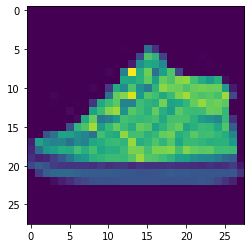

In [5]:
plt.figure()
plt.imshow(train_images[EXAMPLE_INDEX].reshape(28, 28))
plt.show()

[0 1 2 3 4 5 6 7 8 9]
(10,)


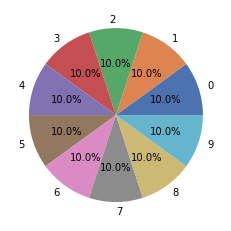

In [6]:
#looking at distribution of targets/labels 
labels = (np.unique(train_labels))
print(labels)
print(labels.shape)
percentages = []
for i in range(labels.size):
    count_labels = np.count_nonzero(train_labels == i)
    percentages.append((count_labels/train_labels.size)*100)
fig, ax = plt.subplots()
colorscale = sns.color_palette("deep")
ax.pie(percentages, labels=labels, autopct='%1.1f%%', colors = colorscale)
plt.show()

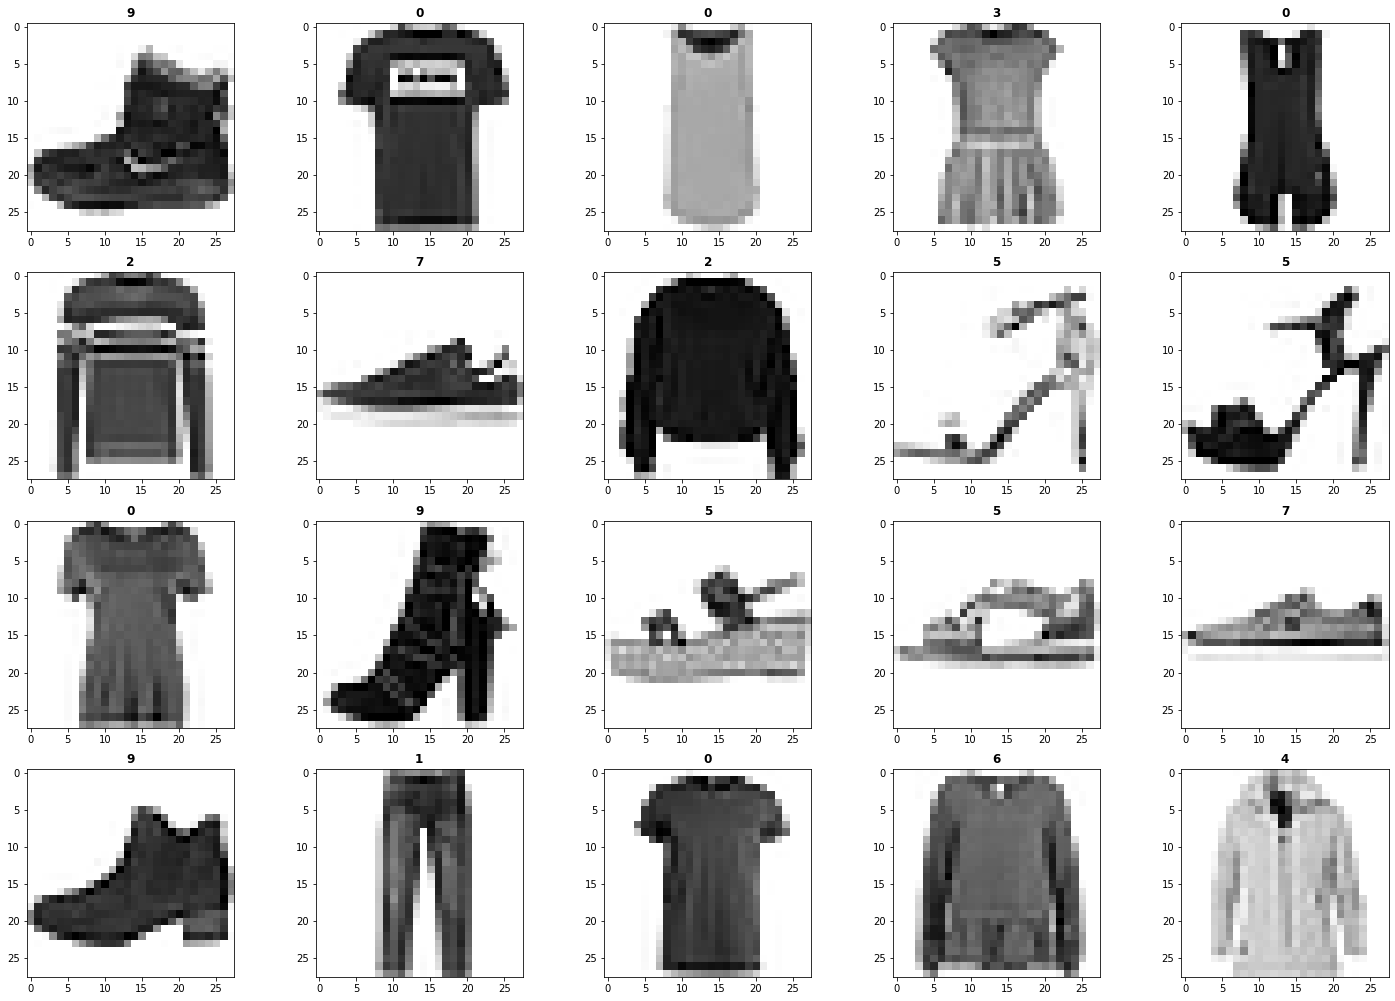

In [7]:
#visualizing the images

fig = plt.figure(figsize = (25,45))
fig.tight_layout()
Images = np.array(train_images)
for i in range(0,20):
    plt.subplot(10,5,i+1)
    image = Images[i].reshape(28,28)
    plt.imshow(image, cmap='binary')
    plt.title(labels[train_labels[i]], fontweight="bold")

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  94  36   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0  57 184 166  52   0   0   0   0   2   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0  19 128 153 149 119   0   0   0   0   0   2   0   1   0   0
   0   0   0   0   0   0   0   0   0   0   3   0 113 255 160 198  94 144 185  53   1   0   0   0

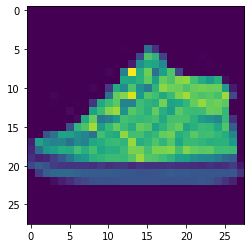

[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.4 0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.2 0.7 0.7 0.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.5 0.6 0.6 0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.4 1.  0.6 0.8 0.4 0.6 0.7 0.2 0.  0.  0.  0.  0.  0. 

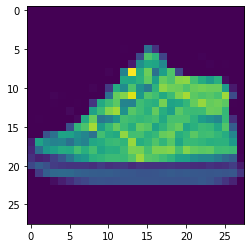

In [8]:
#MinMax Scaling
print(pretty_print(train_images[EXAMPLE_INDEX]))
print(train_images.shape)
plt.figure()
plt.imshow(train_images[EXAMPLE_INDEX].reshape(28, 28))
plt.show()
scaler = MinMaxScaler()
scaler.fit(train_images)
train_images = scaler.transform(train_images)
print(pretty_print(train_images[EXAMPLE_INDEX]))
print(train_images.shape)
plt.figure()
plt.imshow(train_images[EXAMPLE_INDEX].reshape(28, 28))
plt.show()

In [9]:
##We can remove features with low variance, set some variance threshold?
##scikitlearn has a library with classes to help with this
from sklearn.feature_selection import VarianceThreshold

In [10]:
selector = VarianceThreshold(threshold = 0.1)
new = selector.fit_transform(train_images)
new.shape


(60000, 402)

In [11]:
##Hard part is that not all features may be on same scale, so we should normalize? 

In [12]:
normal = train_images / np.mean(train_images)

In [13]:
selector = VarianceThreshold(threshold = 0.1)
new_normal = selector.fit_transform(normal)
new_normal.shape

(60000, 703)

In [14]:
#This may be more accurate

[0.8351666666666666, 0.8386666666666667, 0.84175, 0.8411333333333333, 0.8403, 0.8380666666666666, 0.8364166666666666, 0.8353166666666667, 0.8337666666666668, 0.8336499999999999, 0.8324333333333331, 0.8311166666666667, 0.8295, 0.8292333333333334, 0.8278666666666666]
[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]


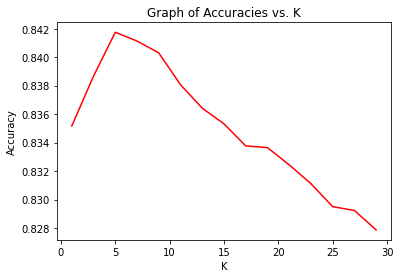

In [15]:
# xx and yy are just to make it run faster 

Accuracies = []
K = []
xx = new[0:5000]
yy = train_labels[0:5000]
for k in range(1,31):
    if k%2 != 0:
        neighbors = KNeighborsClassifier(n_neighbors=k)
        neighbors.fit(xx, yy)
        scores = cross_val_score(neighbors, new, train_labels, cv = 10, scoring= 'accuracy')
        accuracy = scores.mean()
        Accuracies.append(accuracy)
        K.append(k)
print(Accuracies)
print(K)
plt.title('Graph of Accuracies vs. K')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.plot(K, Accuracies, color = 'r')
plt.show()

In [ ]:
#the final training KNN run to display the accuracy on training data for all
#60,0000 examples on the best performing k from the 500
